###

### Notebook: Prepper for rendering code

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

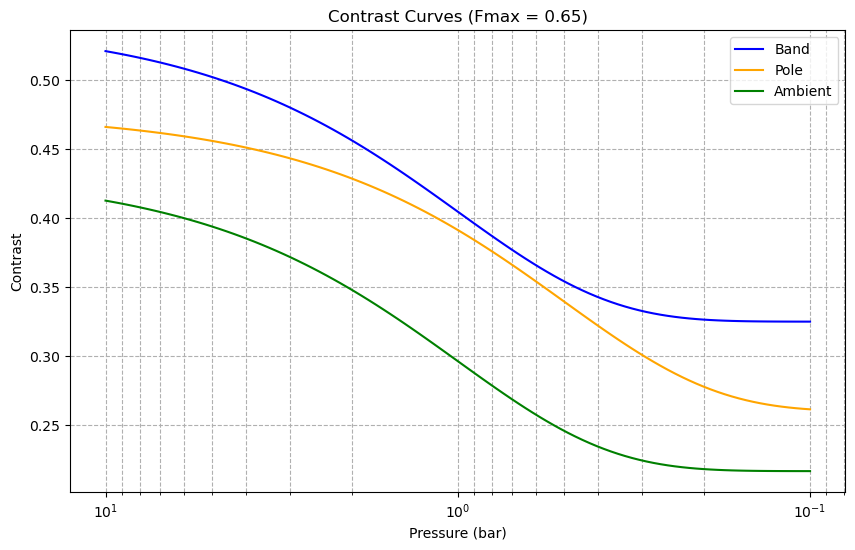

In [17]:
def generate_contrast_curves(option="exp", custom_file=None, Fmax=0.65):
    """
    Generate contrast curves for Band, Pole, and Ambient based on the specified option.
    Use Fmax as the maximum contrast value for scaling.

    Parameters:
        option (str): The type of function to use for generating contrast curves. 
                      Options are "exp", "lin", or "custom".
        custom_file (str): Path to a file containing custom contrast values (used for "custom" option).
        Fmax (float): Maximum contrast value for scaling (default is 0.65).

    Returns:
        pd.DataFrame: A DataFrame containing the contrast curves for Band, Pole, and Ambient.
    """
    # Generate a grid of log10 pressures from 0.1 bar to 10 bar
    pressures = np.logspace(-1, 1, 100)[::-1]  # Reverse the array to flip the direction

    if option == "exp":
        # Generate gentle exponential functions
        band = (np.exp(-1*pressures) + 1.5) / 3.0 * Fmax  # Scale to Fmax
        pole = (np.exp(-0.5*pressures) + 1.2) / 3.0 * Fmax
        ambient = (np.exp(-1*pressures) + 1.0) / 3.0 * Fmax
        
    elif option == "lin":
        # Generate linear functions
        band = (-pressures + 1.5) / 3.0 * Fmax  # Scale to Fmax
        pole = (-pressures + 1.2) / 3.0 * Fmax
        ambient = (-pressures + 1.0) / 3.0 * Fmax
        
    elif option == "custom":
        if custom_file is None:
            raise ValueError("Custom file path must be provided for 'custom' option.")
        # Read custom contrast values from the file
        custom_data = pd.read_csv(custom_file)
        if not all(col in custom_data.columns for col in ["Band", "Pole", "Ambient"]):
            raise ValueError("Custom file must contain 'Band', 'Pole', and 'Ambient' columns.")
        band = custom_data["Band"].values * Fmax / max(custom_data["Band"].max(), 1)
        pole = custom_data["Pole"].values * Fmax / max(custom_data["Pole"].max(), 1)
        ambient = custom_data["Ambient"].values * Fmax / max(custom_data["Ambient"].max(), 1)
    else:
        raise ValueError("Invalid option. Choose from 'exp', 'lin', or 'custom'.")

    # Create a DataFrame for the results
    contrast_df = pd.DataFrame({
        "Pressure (bar)": pressures[::-1],
        "Band": band,
        "Pole": pole,
        "Ambient": ambient
    })

    return contrast_df

# Example usage:
df = generate_contrast_curves(option="exp", Fmax=0.65)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df["Pressure (bar)"], df["Band"], label="Band", color='blue') 
plt.plot(df["Pressure (bar)"], df["Pole"], label="Pole", color='orange')
plt.plot(df["Pressure (bar)"], df["Ambient"], label="Ambient", color='green') 
plt.xscale('log')
plt.xlabel("Pressure (bar)")
plt.ylabel("Contrast")
plt.title("Contrast Curves (Fmax = 0.65)")
plt.legend()
plt.grid(True, which="both", ls="--")

# Flip the x-axis to ensure higher pressure is on the left
plt.gca().invert_xaxis()

plt.show()